<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

#### Step 1: Load the dataset


In [17]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

import sqlite3
# Connect to your SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




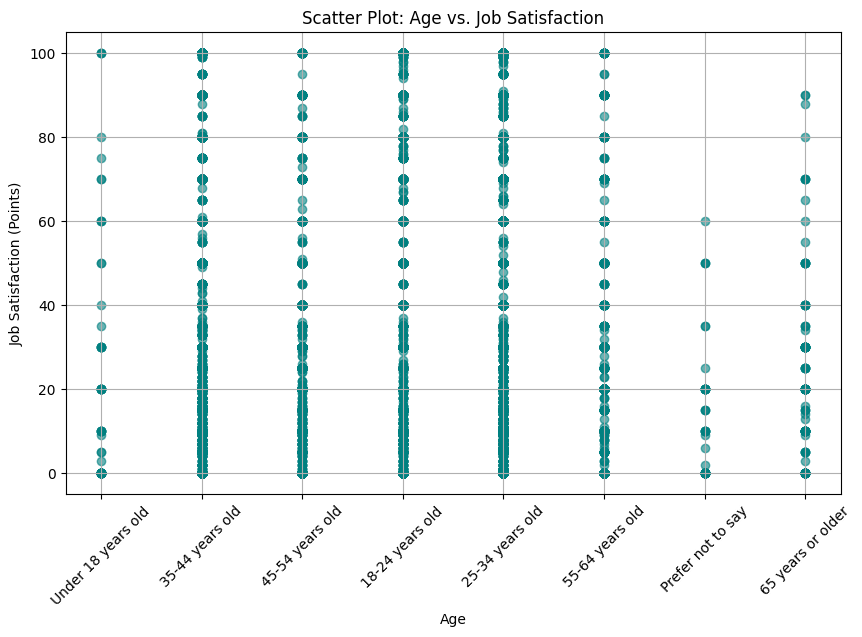

In [3]:
## Write your code here
query = "SELECT Age, JobSatPoints_6 FROM main"
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['JobSatPoints_6'], alpha=0.6, color='teal')
plt.title('Scatter Plot: Age vs. Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (Points)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


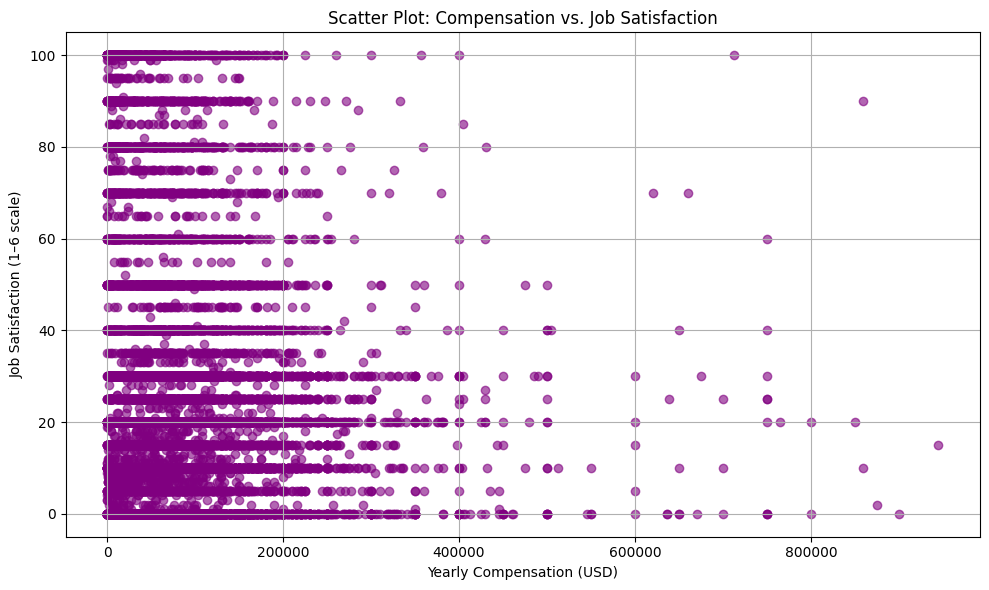

In [4]:
## Write your code here
#  Query the relevant data
query = 'SELECT ConvertedCompYearly, JobSatPoints_6 FROM main'

df = pd.read_sql_query(query, conn)
df = df[df["ConvertedCompYearly"] < 1e6] 

#  Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'], alpha=0.6, color='purple')
plt.title('Scatter Plot: Compensation vs. Job Satisfaction')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (1–6 scale)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


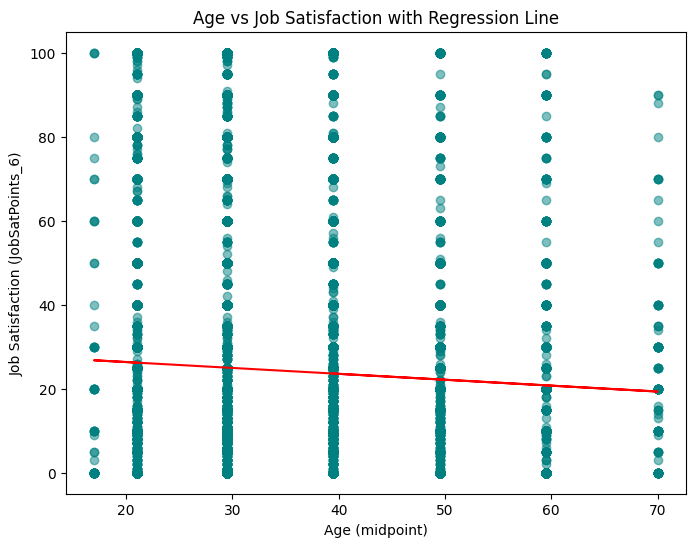

In [8]:
## Write your code here
import numpy as np

#  Query the relevant data
query = 'SELECT Age, JobSatPoints_6 FROM main'

df = pd.read_sql_query(query, conn)

# Copy needed columns
task3_df = df[['Age', 'JobSatPoints_6']].dropna().copy()

# Step 1: Convert Age groups into numeric midpoints
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
task3_df['Age'] = task3_df['Age'].map(age_map)

# Step 2: Ensure JobSatPoints_6 is numeric
task3_df['JobSatPoints_6'] = pd.to_numeric(task3_df['JobSatPoints_6'], errors='coerce')

# Drop rows with missing after conversion
task3_df = task3_df.dropna()

# Plot with regression line
plt.figure(figsize=(8,6))
plt.scatter(task3_df['Age'], task3_df['JobSatPoints_6'], alpha=0.5, color='teal')

# Fit regression line
m, b = np.polyfit(task3_df['Age'], task3_df['JobSatPoints_6'], 1)
plt.plot(task3_df['Age'], m*task3_df['Age'] + b, color='red')

plt.title("Age vs Job Satisfaction with Regression Line")
plt.xlabel("Age (midpoint)")
plt.ylabel("Job Satisfaction (JobSatPoints_6)")
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


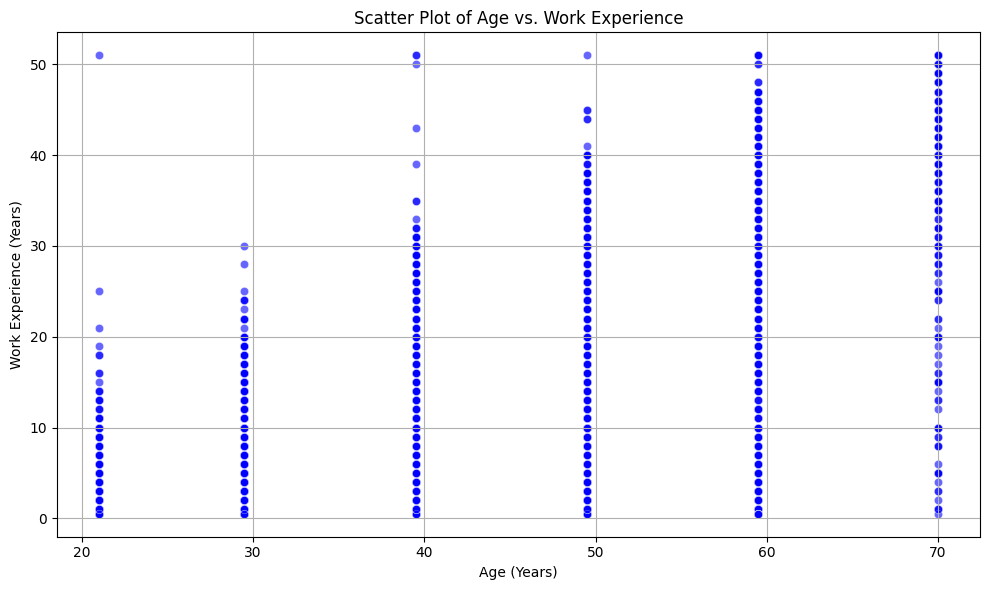

In [12]:
## Write your code here
#  Query the relevant data
query = 'SELECT Age, YearsCodePro FROM main'
df = pd.read_sql_query(query, conn)

# Map Age ranges to approximate midpoints
age_map = {
    "Under 18 years old": None,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}
df['Age'] = df['Age'].map(age_map)

# Clean YearsCodePro
df['YearsCodePro'] = df['YearsCodePro'].replace(
    {"Less than 1 year": 0.5, "More than 50 years": 51}
)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=['Age', 'YearsCodePro'])

# Filter for reasonable ranges
df = df[(df['Age'] >= 18) & (df['Age'] <= 70)]
df = df[df['YearsCodePro'] >= 0]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='YearsCodePro', data=df, color='blue', alpha=0.6)
plt.title('Scatter Plot of Age vs. Work Experience')
plt.xlabel('Age (Years)')
plt.ylabel('Work Experience (Years)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


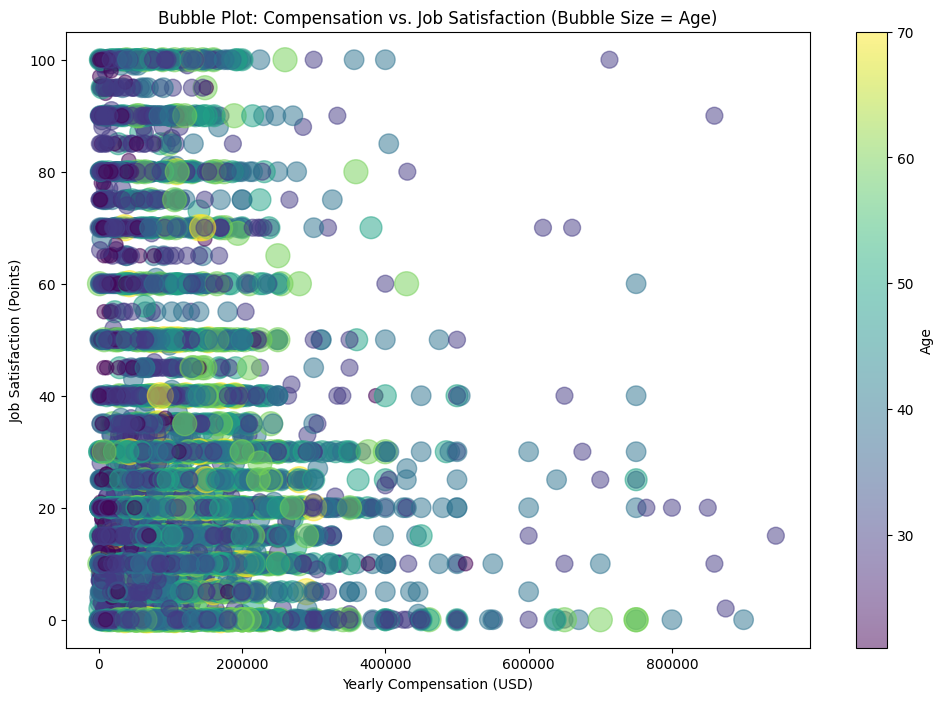

In [14]:
## Write your code here

# Query the relevant data
query = 'SELECT ConvertedCompYearly, JobSatPoints_6, Age FROM main'
df = pd.read_sql_query(query, conn)

# Map Age ranges to approximate midpoints
age_map = {
    "Under 18 years old": None,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}
df['Age'] = df['Age'].map(age_map)

# Convert numeric fields
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['Age', 'ConvertedCompYearly', 'JobSatPoints_6'])

# Filter unrealistic compensation (e.g. < 1K or > 1M USD)
df = df[(df['ConvertedCompYearly'] > 1000) & (df['ConvertedCompYearly'] < 1_000_000)]

# Bubble Plot
plt.figure(figsize=(12,8))
plt.scatter(
    x=df['ConvertedCompYearly'], 
    y=df['JobSatPoints_6'], 
    s=df['Age']*5,  # scale bubble size
    alpha=0.5, 
    c=df['Age'], 
    cmap='viridis'
)

plt.title("Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age)")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction (Points)")
plt.colorbar(label="Age")
plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


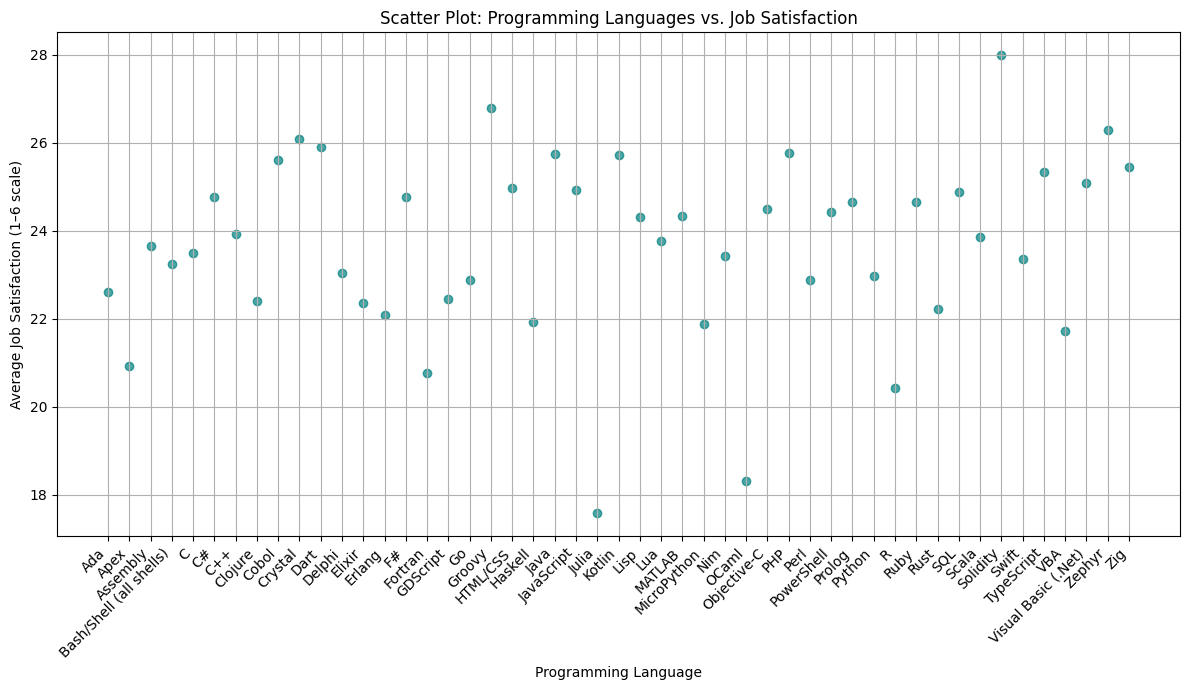

In [18]:
## Write your code here

#  Query the relevant data
query = 'SELECT LanguageHaveWorkedWith, JobSatPoints_6 FROM main'
df = pd.read_sql_query(query, conn)

#  Clean and prepare data
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6'], inplace=True)

# Explode multiple languages into separate rows
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df.explode('LanguageHaveWorkedWith')

# Group by language and calculate average satisfaction
lang_satisfaction = df_exploded.groupby('LanguageHaveWorkedWith')['JobSatPoints_6'].mean().reset_index()

#  Create scatter plot
plt.figure(figsize=(12, 7))
plt.scatter(lang_satisfaction['LanguageHaveWorkedWith'], lang_satisfaction['JobSatPoints_6'], color='teal', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.title('Scatter Plot: Programming Languages vs. Job Satisfaction')
plt.xlabel('Programming Language')
plt.ylabel('Average Job Satisfaction (1–6 scale)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_1370/126662470.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


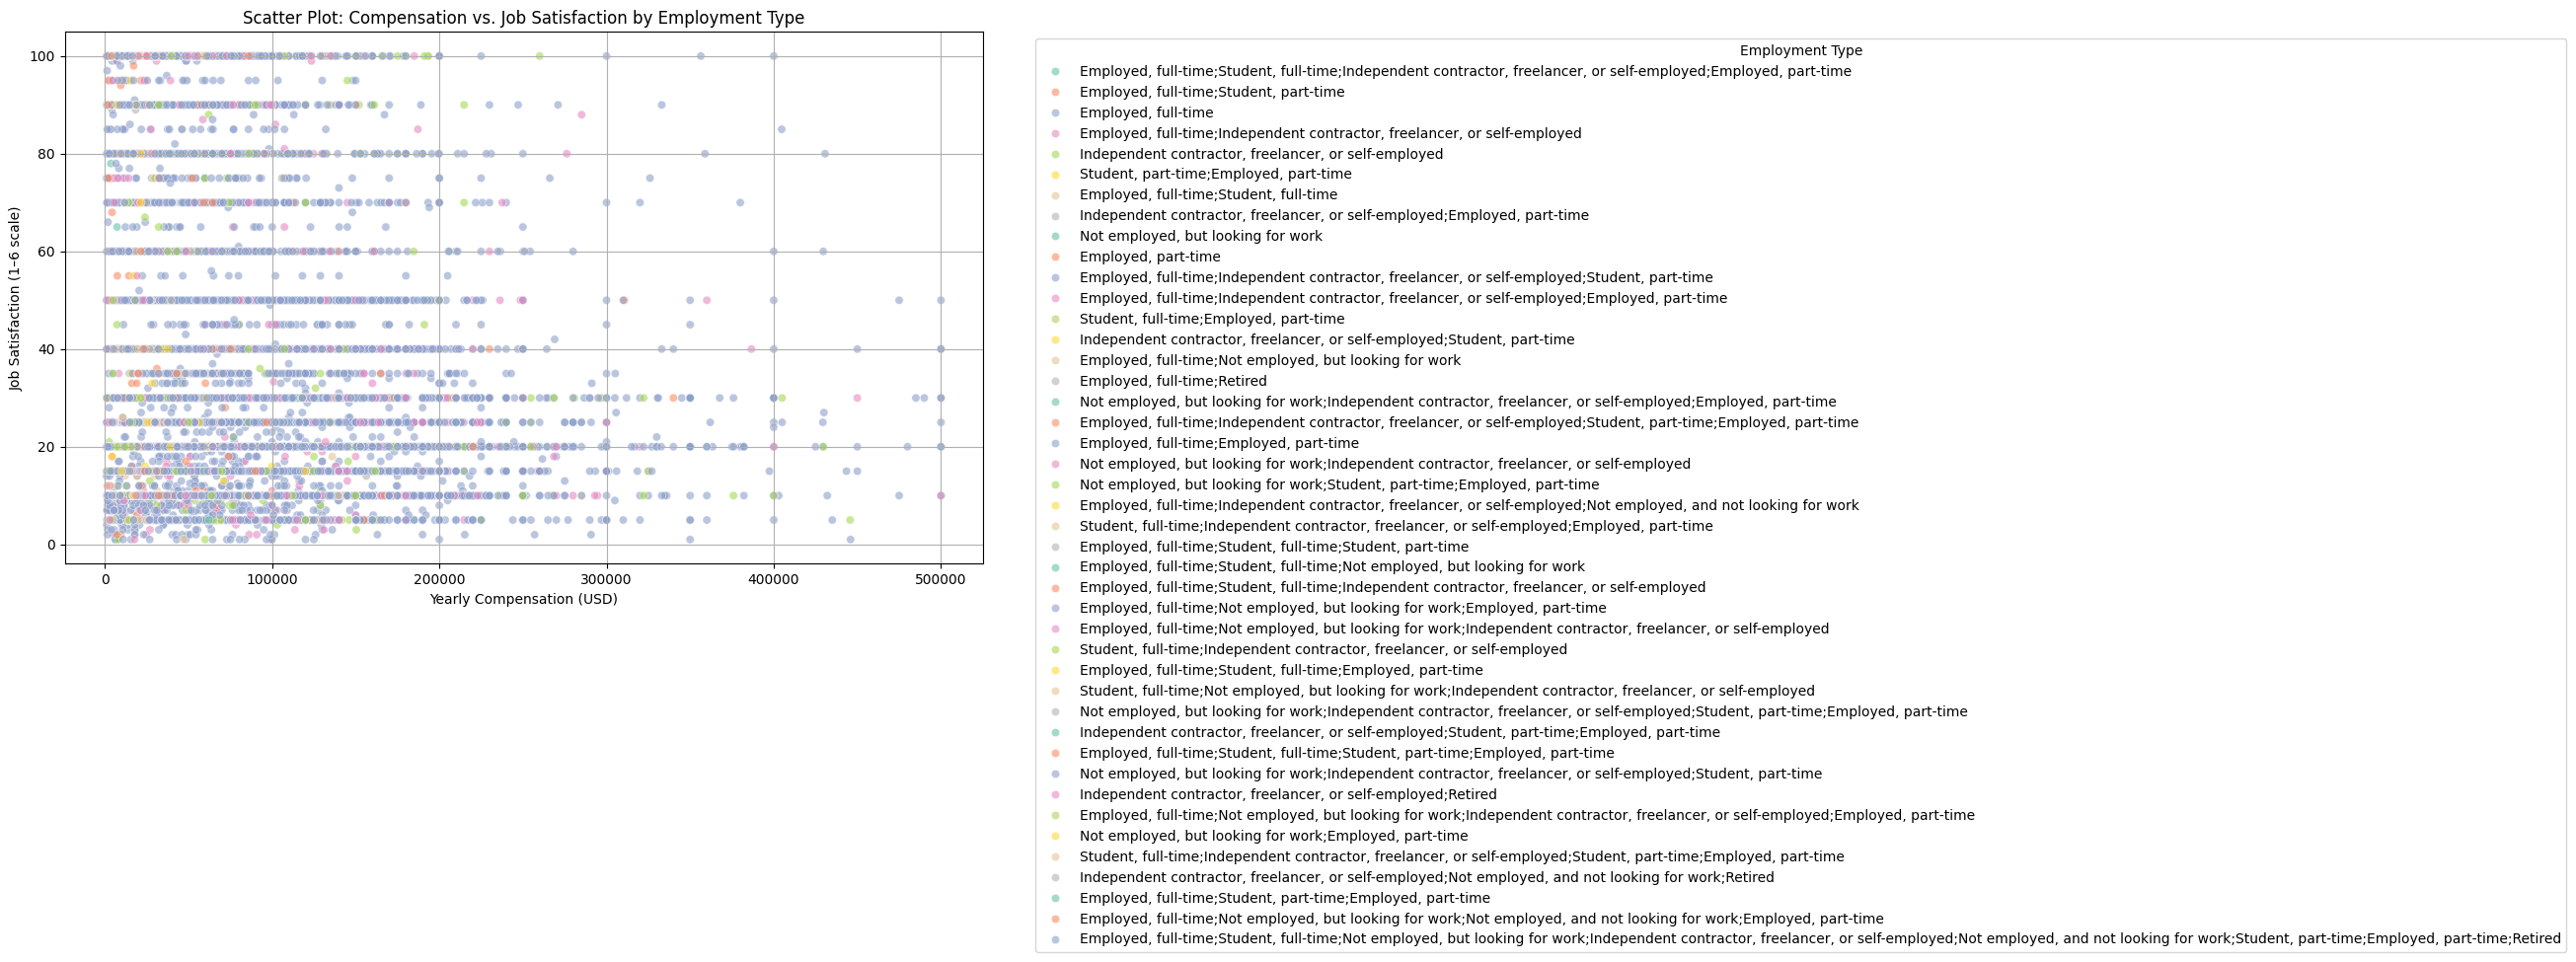

In [20]:
## Write your code here
#  Query the relevant data
query = 'SELECT ConvertedCompYearly, JobSatPoints_6, Employment FROM main'
df = pd.read_sql_query(query, conn)

# Convert numeric fields
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

#  Drop missing or unrealistic values
df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment'], inplace=True)
df = df[(df['ConvertedCompYearly'] >= 1000) & (df['ConvertedCompYearly'] <= 500000)]
df = df[(df['JobSatPoints_6'] >= 1) & (df['JobSatPoints_6'] <= 100)]

# Create scatter plot with color-coded employment types
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='Employment',
    alpha=0.6,
    palette='Set2'
)

#  Final plot formatting
plt.title('Scatter Plot: Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (1–6 scale)')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


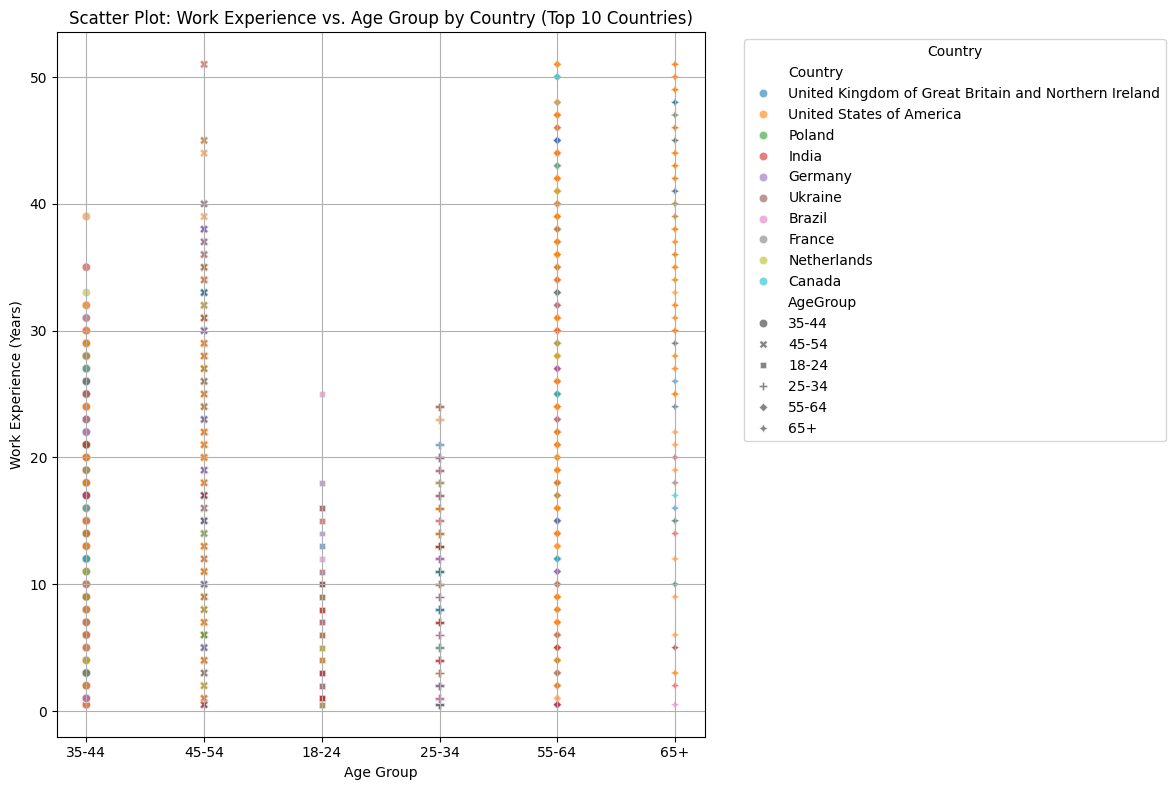

In [22]:
## Write your code here
#  Query the relevant data
query = 'SELECT YearsCodePro, Age, Country FROM main'

df = pd.read_sql_query(query, conn)

#  Map Age ranges to midpoints
age_map = {
    "Under 18 years old": None,
    "18-24 years old": "18-24",
    "25-34 years old": "25-34",
    "35-44 years old": "35-44",
    "45-54 years old": "45-54",
    "55-64 years old": "55-64",
    "65 years or older": "65+"
}
df['AgeGroup'] = df['Age'].map(age_map)

# Clean YearsCodePro
df['YearsCodePro'] = df['YearsCodePro'].replace({
    "Less than 1 year": 0.5,
    "More than 50 years": 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

#  Drop missing values
df.dropna(subset=['YearsCodePro', 'AgeGroup', 'Country'], inplace=True)

#Filter top 10 countries by frequency
top_countries = df['Country'].value_counts().nlargest(10).index
df_top = df[df['Country'].isin(top_countries)]

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_top,
    x='AgeGroup',
    y='YearsCodePro',
    hue='Country',
    style='AgeGroup',
    alpha=0.6
)

# Final formatting
plt.title('Scatter Plot: Work Experience vs. Age Group by Country (Top 10 Countries)')
plt.xlabel('Age Group')
plt.ylabel('Work Experience (Years)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
conn.close()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
